# Jet tagging with Quantum Machine Learning @ LHCb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset
The dataset is stored in two csv files produced using LHCb OpenData tuples that are publicly available.
Test dataset contains also variables needed afterwards for analysis.

In [2]:
import pandas as pd
# All Input variables
allvariables = ['idx',                                     # jet index
             'Jet_foundMuon', 'Jet_muon_q', 'Jet_muon_PT', #  global (anti-)muon variables
             'Jet_PT', 'Jet_ETA', 'Jet_PHI',               #  global jet variables
             'mu_Q', 'mu_pTrel','mu_dist',                 # (anti-)muon
             'k_Q', 'k_pTrel','k_dist',                    # (anti-)kaon
             'pi_Q', 'pi_pTrel','pi_dist',                 # (anti-)pion
             'e_Q', 'e_pTrel','e_dist',                    # (anti-)electron
             'p_Q', 'p_pTrel','p_dist',                    # (anti-)proton
             'Jet_QTOT',                                   # Weighted Jet Total Charge
             'Jet_LABEL']                                  # Ground Truth label

# Input variables of the quantum circuit
variables = ['idx',                                        # jet index
             'mu_Q', 'mu_pTrel','mu_dist',                 # (anti-)muon
             'k_Q', 'k_pTrel','k_dist',                    # (anti-)kaon
             'pi_Q', 'pi_pTrel','pi_dist',                 # (anti-)pion
             'e_Q', 'e_pTrel','e_dist',                    # (anti-)electron
             'p_Q', 'p_pTrel','p_dist',                    # (anti-)proton
             'Jet_QTOT',                                   # Weighted Jet Total Charge
             'Jet_LABEL']                                  # Ground Truth label

# Events are split in two subsets for training and testing
trainData = pd.read_csv("./data/trainData.csv")[variables]
testData = pd.read_csv("./data/testData.csv")[allvariables]

In [3]:
trainData

,idx,mu_Q,mu_pTrel,mu_dist,k_Q,k_pTrel,k_dist,pi_Q,pi_pTrel,pi_dist,e_Q,e_pTrel,e_dist,p_Q,p_pTrel,p_dist,Jet_QTOT,Jet_LABEL
0,193050_bbdw50V2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,890.095232,0.183681,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.074850,1
1,149852_bbdw50V2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,626.426733,0.143763,1.0,46.453933,0.145099,0.0,0.000000,0.000000,0.265662,1
2,105744_bbdw20V2,0.0,0.000000,0.000000,-1.0,18.137164,0.005636,1.0,818.093614,0.397854,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.111038,0
3,210937_bbdw50V2,0.0,0.000000,0.000000,1.0,325.469288,0.325645,1.0,2225.300742,0.079475,-1.0,121.388362,0.451234,0.0,0.000000,0.000000,0.802690,1
4,200964_bbdw20V2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1.0,643.830874,0.247228,1.0,13.429954,0.022191,0.0,0.000000,0.000000,-0.337908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442822,179252_bbup20V2,0.0,0.000000,0.000000,1.0,816.199330,0.431660,-1.0,238.314901,0.025363,1.0,1.422987,0.004671,-1.0,618.842862,0.162634,0.049430,1
442823,129589_bbdw50V2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,874.153517,0.406933,-1.0,94.079730,0.129382,0.0,0.000000,0.000000,-0.051080,1
442824,186866_bbdw20V2,1.0,850.089781,0.159359,0.0,0.000000,0.000000,1.0,391.015117,0.234847,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.827509,1
442825,262204_bbup50V2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1.0,627.943798,0.218008,0.0,0.000000,0.000000,1.0,349.426663,0.207633,0.187058,0


 ## Preprocessing
 The variables need to be preprocessed before the training process. Here we adopt a technique that suited well for our QML application: firstly data are normalized using a StandardScaler, then the arctan function is applied.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pd.concat([trainData,testData])[variables[1:-1]])
trainData[variables[1:-1]] = np.arctan(trainData[variables[1:-1]])
testData[variables[1:-1]] = np.arctan(testData[variables[1:-1]])

In [5]:
trainData

,idx,mu_Q,mu_pTrel,mu_dist,k_Q,k_pTrel,k_dist,pi_Q,pi_pTrel,pi_dist,e_Q,e_pTrel,e_dist,p_Q,p_pTrel,p_dist,Jet_QTOT,Jet_LABEL
0,193050_bbdw50V2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.785398,1.569673,0.181656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074711,1
1,149852_bbdw50V2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.785398,1.569200,0.142785,0.785398,1.549273,0.144093,0.000000,0.000000,0.000000,0.259664,1
2,105744_bbdw20V2,0.000000,0.00000,0.00000,-0.785398,1.515717,0.005636,0.785398,1.569574,0.378655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110585,0
3,210937_bbdw50V2,0.000000,0.00000,0.00000,0.785398,1.567724,0.314815,0.785398,1.570347,0.079308,-0.785398,1.562558,0.423880,0.000000,0.000000,0.000000,0.676379,1
4,200964_bbdw20V2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,-0.785398,1.569243,0.242368,0.785398,1.496473,0.022187,0.000000,0.000000,0.000000,-0.325862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442822,179252_bbup20V2,0.000000,0.00000,0.00000,0.785398,1.569571,0.407498,-0.785398,1.566600,0.025357,0.785398,0.958229,0.004670,-0.785398,1.569180,0.161223,0.049390,1
442823,129589_bbdw50V2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.785398,1.569652,0.386469,-0.785398,1.560167,0.128667,0.000000,0.000000,0.000000,-0.051036,1
442824,186866_bbdw20V2,0.785398,1.56962,0.15803,0.000000,0.000000,0.000000,0.785398,1.568239,0.230667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.691291,1
442825,262204_bbup50V2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,-0.785398,1.569204,0.214649,0.000000,0.000000,0.000000,0.785398,1.567935,0.204724,0.184921,0


## QML Model
![Circuit](img/circuit.png)



In [6]:
import pennylane as qml

n_qubits = 4
n_layers = 4

# default.qubit.tf is a quantum simulator that uses Tensorflow as backend
# it supports back-propagation, which is useful with a large number of
# parameters

dev = qml.device("default.qubit.tf",wires=n_qubits) # Device initialization

# In pennylane, quantum circuits are mostly defined via the qnode decorator
# applied to a function which describes the quantum gates to be applied to 
# each qubit and, finally, the measurement to be performed.

@qml.qnode(dev, interface="tf", diff_method='backprop')
def circuit(inputs,weights):
    
# The AmplitudeEmbedding template implements the embedding of 2**N features
# in N qubits. Amplitudes must be < 0, so a normalization is performed. 
    qml.templates.AmplitudeEmbedding(inputs,wires=range(n_qubits),normalize=True)
    
# The StronglyEntanglingLayers templates implements a variable number of
# layers made of rotation around all the axes and CNOT gates. Rotation angles
# are passed via the weights parameter of dimension (n_layers,n_qubits,3)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(4))
    
# Finally, the expectation value of the Sigma_Z Pauli matrix of the first qubit
# is measured. It will range from -1 to 1 and will be mapped to a label prediction
    return qml.expval(qml.PauliZ(0))

2021-07-07 18:03:13.167076: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-07-07 18:03:13.168954: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-07 18:03:13.172172: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Keras model
A great feature of pennylane is that it can be integrated flawlessly inside Keras and PyTorch models. This allows for the developing of hybrid quantum-classical machine learning models. 

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation

# We generate the quantum Keras layer, specifiying the dimension of the
# trainable parameters and of the output of the layer.
quantum_layer = qml.qnn.keras.KerasLayer(circuit,weight_shapes={'weights':(n_layers,n_qubits,3)},output_dim=1)

# Finally, we build a Sequencial model appending a sigmoid function to
# the quantum layer
model = Sequential([quantum_layer,Activation('sigmoid')])

## Training
For the training part you can define:
- learning rate
- loss function
- training and validation size
- number of epochs

In [8]:
from tensorflow.keras.optimizers import Adam

# Let's pick an optimizer
opt = Adam(learning_rate=0.02)

# We choose the Mean Square Error as our loss function and a binary
# accuracy as our metric
model.compile(opt, loss="mse",metrics=['binary_accuracy']) 

# We fix the size of the training dataset and validation dataset
training_size   = 200
validation_size = 200

# And build a balanced training sample ...
bsample = trainData[trainData.Jet_LABEL == 0].sample(training_size//2)
bbarsample = trainData[trainData.Jet_LABEL == 1].sample(training_size//2)

training_sample = pd.concat([bsample,bbarsample]).sample(frac=1.0)

X = training_sample[variables[1:-1]]
Y = training_sample[variables[-1]]

# And validation sample
val_bsample = testData[testData.Jet_LABEL == 0].sample(validation_size//2)
val_bbarsample = testData[testData.Jet_LABEL == 1].sample(validation_size//2)

validation_sample = pd.concat([val_bsample,val_bbarsample]).sample(frac=1.0)

val_X = validation_sample[variables[1:-1]]
val_Y = validation_sample[variables[-1]]

# Finally, we start the training process
n_epochs = 10
history_fit = model.fit(X,Y,epochs=n_epochs,validation_data=(val_X,val_Y))

2021-07-07 18:03:13.467149: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-07 18:03:13.473782: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2999985000 Hz


Epoch 1/10
7/7 [==============================] - 19s 3s/step - loss: 0.2717 - binary_accuracy: 0.4186 - val_loss: 0.2529 - val_binary_accuracy: 0.5134
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 0.2536 - binary_accuracy: 0.4919 - val_loss: 0.2489 - val_binary_accuracy: 0.4955
Epoch 3/10
7/7 [==============================] - 19s 3s/step - loss: 0.2541 - binary_accuracy: 0.5114 - val_loss: 0.2452 - val_binary_accuracy: 0.4955
Epoch 4/10
7/7 [==============================] - 20s 3s/step - loss: 0.2467 - binary_accuracy: 0.5210 - val_loss: 0.2415 - val_binary_accuracy: 0.5625
Epoch 5/10
7/7 [==============================] - 19s 3s/step - loss: 0.2444 - binary_accuracy: 0.5197 - val_loss: 0.2395 - val_binary_accuracy: 0.5759
Epoch 6/10
7/7 [==============================] - 18s 3s/step - loss: 0.2436 - binary_accuracy: 0.5218 - val_loss: 0.2388 - val_binary_accuracy: 0.6071
Epoch 7/10
7/7 [==============================] - 18s 3s/step - loss: 0.2410 - binary_ac

## Training results
Standard training results such as the loss function and the accuracy can be plotted with respect to the number of epochs.

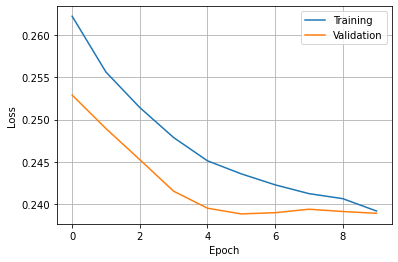

In [9]:
plt.plot(history_fit.history['loss'], label="Training")
plt.plot(history_fit.history['val_loss'], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

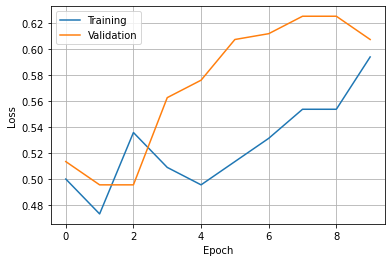

In [10]:
plt.plot(history_fit.history['binary_accuracy'], label="Training")
plt.plot(history_fit.history['val_binary_accuracy'], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

## Testing
We now perform some testing on a test dataset. The workflow is the following:
- get a test data with a balanced number of b and bbar events
- evaluate the model on the test dataset
- get prediction for each event

In [11]:

# Let's also build a balanced testing sample
testing_size = 1000

test_bsample = testData[testData.Jet_LABEL == 0].sample(testing_size//2)
test_bbarsample = testData[testData.Jet_LABEL == 1].sample(testing_size//2)

testing_sample = pd.concat([test_bsample,test_bbarsample]).sample(frac=1.0)

test_X = testing_sample[variables[1:-1]]
test_Y = testing_sample[variables[-1]]

# And let's predict the label with our trained model
test_predY= model.predict(test_X)
testing_sample['RawPred'] = test_predY
testing_sample['Jet_PREDLABEL'] = np.round(test_predY)

## Testing results

### Prediction distribution

[]

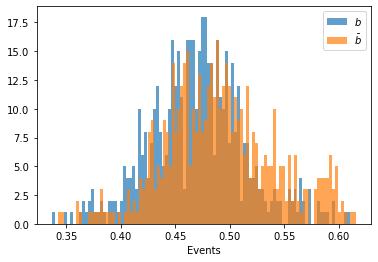

In [12]:
plt.hist(testing_sample[testing_sample['Jet_LABEL'] == 0]['RawPred'],bins=100,alpha=0.7,label="$b$")
plt.hist(testing_sample[testing_sample['Jet_LABEL'] == 1]['RawPred'],bins=100,alpha=0.7,label="$\\bar{b}$")
plt.xlabel("RawPred")
plt.xlabel("Events")
plt.legend()
plt.plot()

## Receiver Operating Characteristic (ROC) curve and Area Under Curve (AUC)
Usual metrics such as ROC curve and AUC can be computed.

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr,tpr, _ = roc_curve(testing_sample['Jet_LABEL'],testing_sample['RawPred'])
auc = roc_auc_score(testing_sample['Jet_LABEL'],testing_sample['RawPred'])

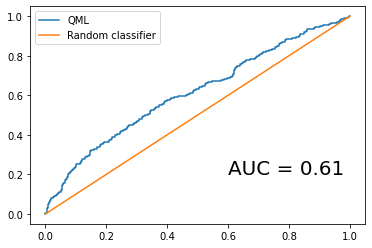

In [14]:
plt.plot(fpr,tpr,label='QML')
plt.plot([0,1],[0,1], label='Random classifier')
plt.text(0.6,0.2,f"AUC = {auc:.2}",fontsize=20)
plt.legend()

## Saving predictions
Once you have tested your dataset you can easily save your model prediction for future analysis.


In [15]:
testing_sample

,idx,Jet_foundMuon,Jet_muon_q,Jet_muon_PT,Jet_PT,Jet_ETA,Jet_PHI,mu_Q,mu_pTrel,mu_dist,...,e_Q,e_pTrel,e_dist,p_Q,p_pTrel,p_dist,Jet_QTOT,Jet_LABEL,RawPred,Jet_PREDLABEL
262700,23912_bbdw15V2,False,0,-99.000000,20005.103296,2.232138,2.814297,0.000000,0.000000,0.000000,...,0.785398,1.563622,0.315777,0.000000,0.000000,0.000000,0.591556,1,0.598309,1.0
228536,282807_bbdw50V2,False,0,-99.000000,55225.145067,2.306755,0.646248,0.000000,0.000000,0.000000,...,0.785398,1.537011,0.073221,-0.785398,1.569561,0.212422,0.061242,0,0.467393,0.0
281923,303441_bbup50V2,True,1,8928.624897,29702.486215,2.641855,2.282986,0.785398,1.569779,0.107477,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162264,1,0.451431,0.0
275231,182867_bbdw50V2,False,0,-99.000000,48504.926344,2.330319,-2.343327,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.314187,0,0.410034,0.0
4744,184582_bbdw50V2,False,0,-99.000000,40433.289529,3.188076,-0.921437,0.000000,0.000000,0.000000,...,0.785398,1.568390,0.022927,0.000000,0.000000,0.000000,0.463489,1,0.545067,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293137,189854_bbdw50V2,False,0,-99.000000,52310.901832,3.297931,-2.263469,0.000000,0.000000,0.000000,...,0.785398,1.566050,0.058874,0.000000,0.000000,0.000000,-0.586522,0,0.467492,0.0
245139,133117_bbdw50V2,False,0,-99.000000,44367.957989,4.016269,-1.850116,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.553786,1,0.413288,0.0
209890,238555_bbup50V2,False,0,-99.000000,25833.351086,2.891877,1.764951,0.000000,0.000000,0.000000,...,0.785398,1.564118,0.286712,0.000000,0.000000,0.000000,-0.014736,1,0.504661,1.0
214294,57107_bbup20V2,False,0,-99.000000,27551.228653,3.437515,-2.265329,0.785398,1.569490,0.341785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057828,1,0.394622,0.0


In [16]:
# Finally, we can save our model prediction for future analysis (bbar asymmetry estimation,
# tagging performance analysis, ...)

testing_sample.to_csv("data_with_predictions.csv",index=False)

Once you got your prediction you can use these two functions to apply (ApplyAlgTagging) and check (ApplyAlgChecking) the classifier response with respect to true information.

In [17]:
def ApplyAlgTagging(df, netype="Quantum", mu_cut=5000):
    """
    Performs the MLAlg tagging for each jet, and applies a probabilities R/L cuts or a muonPT cut.
    netype is used to identify columns name. 
    -> Right cut is for label 1, left cut for label 0 

    COLUMNS REQUIRED          COLUMNS ADDED
    Jet_foundMuon (if MuTag)  "Jet_%s_Charge"%nettype (0: Not tagged)    
    Jet_muon_q    (if MuTag)
    Jet_muon_PT   (if MuTag)
    Jet_%sProb"%netype       
    """
    if (netype=="MuTag"):
      df['Jet_MuTag_Charge'] = 0
      tt_Jet = (df['Jet_foundMuon'] == 1) & (df['Jet_muon_PT'] > mu_cut)
      df.loc[tt_Jet, 'Jet_MuTag_Charge'] = df.loc[tt_Jet].Jet_muon_q
    else:
      df['Jet_%s_Charge'%netype] = 0
      tt_Jet_1 = (df["Jet_%sProb"%netype] > 0.5)
      tt_Jet_0 = (df["Jet_%sProb"%netype] < 0.5)
      df.loc[tt_Jet_1,'Jet_%s_Charge'%netype] =  1
      df.loc[tt_Jet_0,'Jet_%s_Charge'%netype] =  0

def ApplyAlgChecking(df, netype="Quantum"):
    """
    Checks the result of the Alg tagging by comparing the guess with the MC-truth.
    netype is used to identify columns name. 

    COLUMNS REQUIRED           COLUMNS ADDED

    "Jet_%s_Charge"%netype     "Jet_%s_Check"%netype     
    Jet_MATCHED_CHARGE
    """
    df['Jet_%s_Check'%netype] = 0

    tt_correct_jet = df['Jet_%s_Charge'%netype] == df.Jet_MATCHED_CHARGE
    tt_notcorrect_jet = df['Jet_%s_Charge'%netype] != df.Jet_MATCHED_CHARGE

    df.loc[tt_correct_jet, 'Jet_%s_Check'%netype] = 1
    df.loc[tt_notcorrect_jet, 'Jet_%s_Check'%netype] = -1

In [18]:
#rename some variables just for the sake of completeness
testing_sample.rename(columns={"Jet_LABEL": "Jet_MATCHED_CHARGE"}, inplace=True)
testing_sample.rename(columns={"RawPred": "Jet_QuantumProb"}, inplace=True)

#apply algorithm tagging and checking
ApplyAlgTagging(testing_sample, "Quantum")
ApplyAlgChecking(testing_sample, "Quantum")

# Get classifier performances
The "GetAlgPerformances" function extracts the classifier performance and associated uncertainties.
The following quantities are defined:
- efficiency: $ \varepsilon_{eff}=\frac{N_{tag}}{N_{tot}} $
- mistag: $ \varepsilon_{mistag}=\frac{N_{wrong}}{N_{tag}}$
- tagging power: $\varepsilon_{tag}=\varepsilon_{eff}(1-2\varepsilon_{mistag})^2$

Keep in mind that:
- efficiency will always be $100\%$ since the classifier always tries to classify a jet
- the greater the taggin power, the better the classifier (e.g. the tagging power is directly related to the statistical uncertainty of the $b - \bar{b}$ asymmetry)

In [19]:
# these functions are used in the error estimitation of the tagging power
def Deps_DNtag(N_tot,N_w,N_tag):
    return 1.0/N_tot * (1 - (float(N_w)**2)/(N_tag**2))

def Deps_DNw(N_tot,N_w,N_tag):
    return 1.0/N_tot * (-4 + 8*float(N_w)/N_tag)

def GetAlgPerformances(jet_df, netype="Quantum"):

    N_tot = len(jet_df)

    N_tag = jet_df['Jet_%s_Check'%netype].value_counts()[1] + jet_df['Jet_%s_Check'%netype].value_counts()[-1]
    N_wrong = jet_df['Jet_%s_Check'%netype].value_counts()[-1]

    #Efficiency
    eps_eff = float(N_tag)/N_tot
    #Efficiency error
    err_eps_eff = np.sqrt(eps_eff*(1-eps_eff)/N_tot)

    #Mistag
    omega = float(N_wrong)/(N_tag)
    #Mistag error
    err_omega  = np.sqrt(omega*(1-omega)/N_tag)

    #Accuracy
    accuracy = 1- omega
    
    #Tagging Power
    eps_tag = (eps_eff * (1-2*omega)**2)
    #Tagging power error
    err_eps_tag = np.sqrt((N_tot*(eps_eff)*(1-eps_eff)) * Deps_DNtag(N_tot,N_wrong,N_tag)**2 + (N_tag*(omega)*(1-omega)) * Deps_DNw(N_tot,N_wrong,N_tag)**2)
    
    return eps_eff,omega,eps_tag,err_eps_eff,err_omega,err_eps_tag,N_tot,accuracy

The function "Analysis" just compute all the quantities described above in different bins of jet $p_T$. So first of all you define jet $p_T$ bins such as they have the same number of jets, and then you compute all the relevant quantities.

In [20]:
bin_centers = []
half_widths = []

omegas = []
err_omegas = []
effs = []
err_effs = []
ptags = []
err_ptags = []
tot = []
accuracies = []

def Analysis(jet_df, netype="Quantum", nbins=8, basepath="", legend=True):

    # Discretize variable into equal-sized buckets using jet PT
    out,bins = pd.qcut(jet_df.Jet_PT,nbins,retbins=True,labels=False)


    for i in range(nbins):
        bin_center = float((bins[i] + bins[i+1])/2)/1000
        half_width = float((bins[i+1] - bins[i])/2)/1000
        bin_centers.append(bin_center)
        half_widths.append(half_width)
    
        eps_eff,omega,eps_tag,err_eps_eff,err_omega,err_eps_tag,N_tot,accuracy = GetAlgPerformances(jet_df[out == i], netype)
        omegas.append(omega*100)
        err_omegas.append(err_omega*100)
        ptags.append(eps_tag*100)
        err_ptags.append(err_eps_tag*100)
        effs.append(eps_eff*100)
        err_effs.append(err_eps_eff*100)

 
    fig = plt.figure(figsize=(6,6))
    plt.errorbar(bin_centers, ptags, xerr=half_widths, yerr=err_ptags, fmt='o', capsize=2, ms=8)
    plt.xlabel("$\mathrm{P_{T} \ (GeV)}$")
    plt.ylabel("$\mathrm{\epsilon_{tag} \ (\%)}$")

    plt.minorticks_on()
    plt.figtext(0.585,0.790,"LHCb Simulation\nOpen Data", ma='right', fontsize=16)
    plt.show()

    fig = plt.figure(figsize=(6,6))
    plt.errorbar(bin_centers, effs, xerr=half_widths, yerr=err_effs, fmt='o', capsize=2, ms=8)
    plt.xlabel("$\mathrm{P_{T} \ (GeV)}$")
    plt.ylabel("$\mathrm{\epsilon_{eff} \ (\%)}$")

    plt.minorticks_on()
    plt.figtext(0.585,0.790,"LHCb Simulation\nOpen Data", ma='right', fontsize=16)
    plt.show()

    fig = plt.figure(figsize=(6,6))
    plt.errorbar(bin_centers, omegas, xerr=half_widths, yerr=err_omegas, fmt='o', capsize=2, ms=8)
    plt.xlabel("$\mathrm{P_{T} \ (GeV)}$")
    plt.ylabel("$\mathrm{\epsilon_{mistag} \ (\%)}$")

    plt.minorticks_on()
    plt.figtext(0.585,0.790,"LHCb Simulation\nOpen Data", ma='right', fontsize=16)
    plt.show()

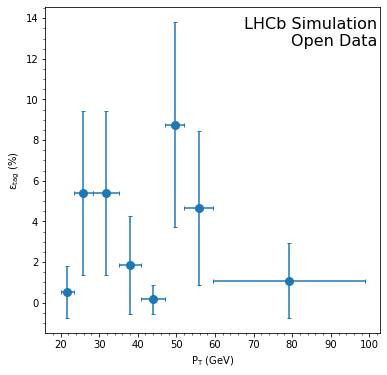

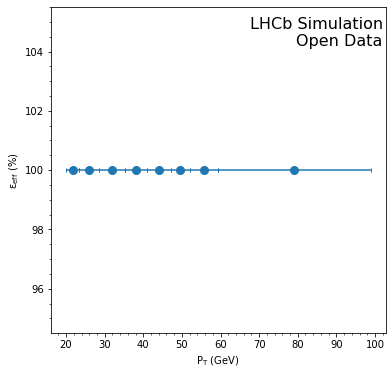

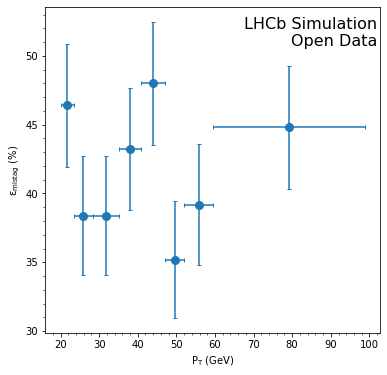

In [21]:
Analysis(testing_sample)